In [ ]:
!pip install tensorflow pillow matplotlib

In [ ]:
!pip uninstall -y tensorflow keras
!pip install tensorflow==2.12.0

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.0 MB/s eta 0:00:00
  A

In [ ]:
import tensorflow as tf
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
import matplotlib.pyplot as plt  # Library for displaying images

Testing image: /content/Test1.jpg


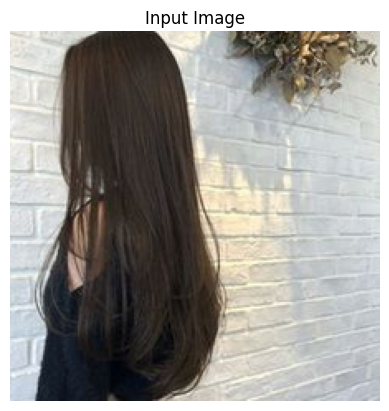

1/1 [==============================] - 1s 822ms/step
Class: 0 Straight
Confidence Score: 0.8690193
Testing image: /content/Test2.jpg


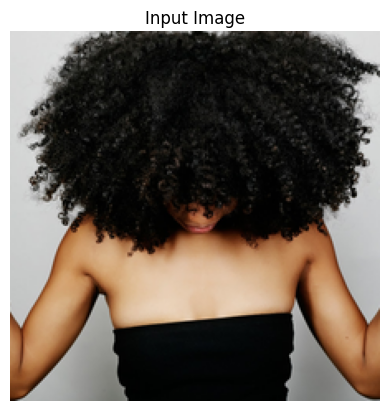

1/1 [==============================] - 0s 43ms/step
Class: 3 Kinky
Confidence Score: 0.99703276
Testing image: /content/Test3.jpg


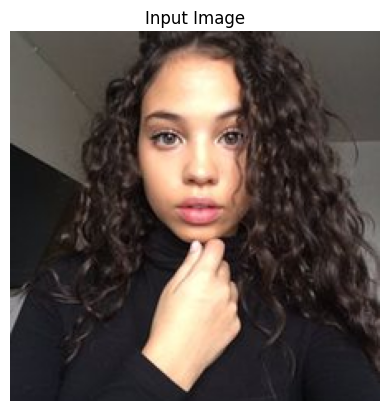

1/1 [==============================] - 0s 39ms/step
Class: 1 Wavy
Confidence Score: 0.8625276


In [ ]:
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)

# Load the labels
with open("/content/labels.txt", "r") as file:
    class_names = file.readlines()

# Function to predict the class of an image
def predict_image(image_path):
    try:
        # Open and preprocess the image
        image = Image.open(image_path).convert("RGB")
        size = (224, 224)
        image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

        # Display the image
        plt.imshow(image)
        plt.axis("off")  # Hide axes for cleaner display
        plt.title("Input Image")
        plt.show()

        # Turn the image into a numpy array
        image_array = np.asarray(image)

        # Normalize the image
        normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

        # Prepare the array for prediction
        data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
        data[0] = normalized_image_array

        # Predict the class using the model
        prediction = model.predict(data)
        index = np.argmax(prediction)
        class_name = class_names[index]
        confidence_score = prediction[0][index]

        # Print prediction and confidence score
        print("Class:", class_name.strip())  # Remove any trailing newlines
        print("Confidence Score:", confidence_score)

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

##############################
# Test 1 (Straight)
image_path = "/content/Test1.jpg"
print(f"Testing image: {image_path}")
predict_image(image_path)

##############################
# Test 2 (Kinky)
image_path = "/content/Test2.jpg"
print(f"Testing image: {image_path}")
predict_image(image_path)

##############################
# Test 3 (Wavy)
image_path = "/content/Test3.jpg"
print(f"Testing image: {image_path}")
predict_image(image_path)